First part of laboratories were conducted by <a href="https://github.com/makskliczkowski">Maksymilian Kliczkowski</a>. He created notebooks we used in laboratories and he help me and my friends with understanding basic and advanced topics in machine learning. I am really glad that I had him as a tutor.

In first course of ML/AI we were build ML models from the ground using math.

In this notebook I will present only some task we had as a homework from notebook about scikit-learn

In [1]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# <center>Support Vector Machines</center>


#### a) Create a random two-dimensional weights vector and plot the decision line for different biases.

Partially Maks's code

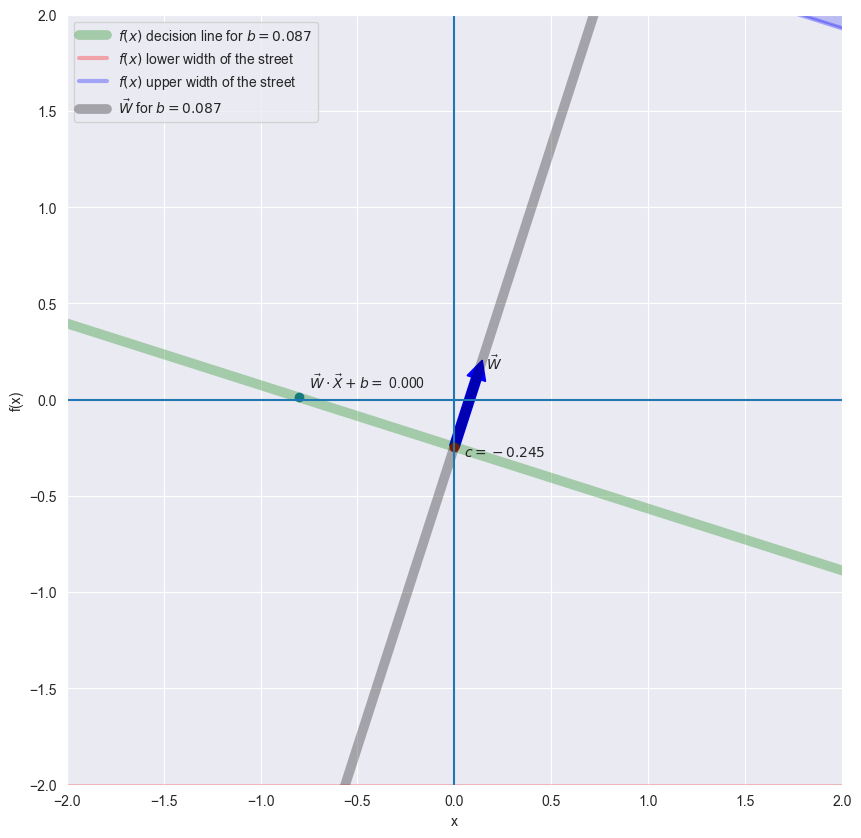

In [2]:
fig, ax = plt.subplots(figsize=(10,10))
# set all the biases
b   = np.random.random() / 10
b1  = b + 1
b2  = b - 1
# set the random weights vector
W   = np.random.random(2)

# define the calculated points on which the decision line crosses the y-axis
c   = -b/W[1]
c1  = -b1/W[1]
c2  = -b2/W[1]
# slope of the line
a   = -W[0]/W[1]

# perpendicular function to W
fp  =   lambda x: a * x + c
fp1 =   lambda x: a * x + c1
fp2 =   lambda x: a * x + c2

# a lambda for parallel function to W (contains the vector W), let's say it crosses the y axis at the same point
f   =   lambda x: -1.0/a * x + c

# set xrange
x   =   np.arange(-2.5, 2.5, 0.11)

# plot decision functions
ax.plot(x,fp(x),
         color = 'green', alpha = 0.3, linewidth=7,
         label = f'$f(x)$ decision line for $b={b:.3f}$')
ax.plot(x,fp1(x), linestyle = '-',
         color = 'red', alpha = 0.3, linewidth=3,
         label = f'$f(x)$ lower width of the street')
ax.fill_between(x, -2, fp1(x), color = 'red', alpha = 0.2)
ax.plot(x,fp2(x),linestyle = '-',
         color = 'blue', alpha = 0.3, linewidth=3,
         label = f'$f(x)$ upper width of the street')
ax.fill_between(x, fp2(x), 2, color = 'blue', alpha = 0.2)
# plot the weights function and the vector
ax.plot(x,f(x),
         color = 'black', alpha = 0.3, linewidth=7,
         label = r'$\vec{W}$ ' + f'for $b={b:.3f}$')

# plot labels
ax.text(W[0] + 0.05, W[1] + 0.05 + c, r'$\vec{W}$')
ax.text(0 + 0.05, c-0.05, f"$c={c:.3f}$")

# plot W vector
ax.arrow(0, c, W[0], W[1], head_width = 0.1, width = 0.05,
          head_length=0.1, color = 'blue')
ax.scatter(0, c, color = 'red')

# check condition W * X laying on f(x) + b = 0
xp = -0.8
yp = fp(xp)
ax.scatter(xp,yp)
ax.text(xp+0.05, yp+0.05, r'$\vec{W}\cdot \vec{X} + b=$' + f'{xp*W[0] + yp*W[1] + b : .3f}')

# axes
ax.axhline(0)
ax.axvline(0)
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.legend()

#### b) Take the data below and analytically find the solution of the Lagrange problem.
- Plot the data and plot the corresponding support vectors.
- Plot the weights vector and the street.
- Calculate the width of the street.
- Experiment with adding a third point to the data.
- You may use the previous functions

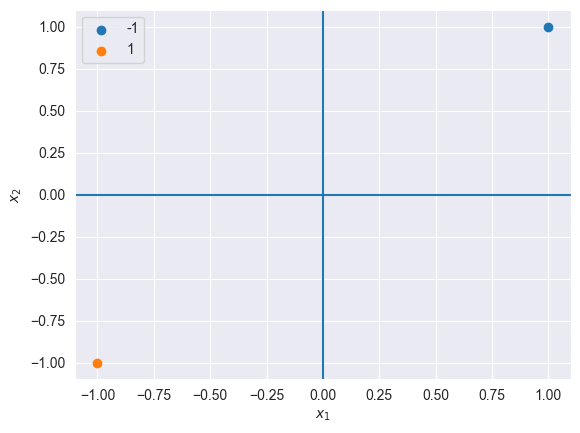

In [3]:
X_1 = np.array([1,1])
Y_1 = -1
X_2 = np.array([-1,-1])
Y_2 = 1
plt.scatter(X_1[0], X_1[1], label = Y_1)
plt.scatter(X_2[0], X_2[1], label = Y_2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axvline(0)
plt.axhline(0)
plt.legend()

In [4]:
# W = \sum _i a_i y_i X_i
a_1     = 1
a_2     = 1
W       = X_1 * Y_1 * a_1 + X_2 * Y_2 * a_2
print(f'W={W}')
norm_w  = np.sqrt(np.sum(np.square(W)))
print(f'norm={norm_w}')
b       = Y_1 - W.dot(X_1)
print(f'b={b}')
width   = (X_2 - X_1).dot(W/norm_w)
print(f'width={width}', r'width/$2\sqrt{2}=$' + f'{width / (2*np.sqrt(2))}')


W=[-2 -2]
norm=2.8284271247461903
b=3
width=2.82842712474619 width/$2\sqrt{2}=$0.9999999999999999


1.5 -1.0


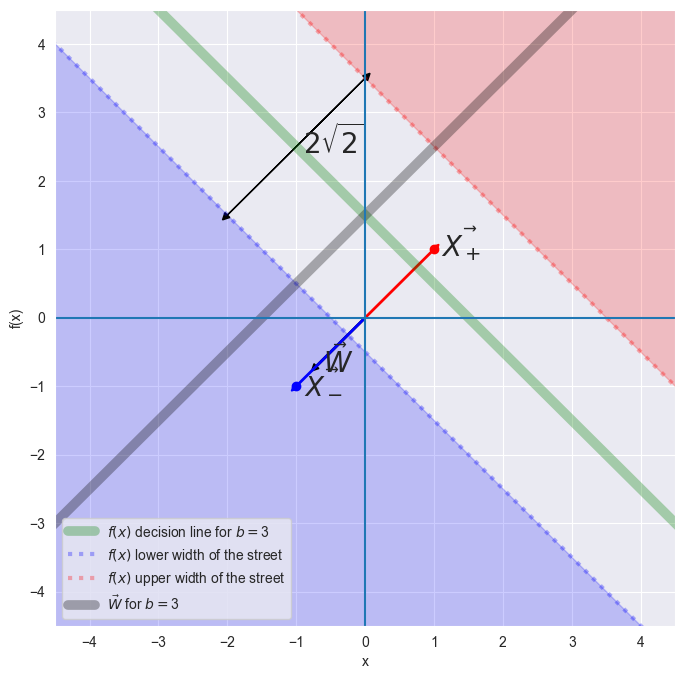

In [5]:
fig, ax     = plt.subplots(figsize=(8,8))

# define the calculated points
c           = -b/W[1]
a           = -W[0]/W[1]
print(c,a)

# perpendicular function to W
fp          = lambda x: a * x + c
fp1         = lambda x: a * (x-X_2[0]) + c + X_2[1]
fp2         = lambda x: a * (x-X_1[0]) + c + X_1[1]

# a function for parallel function to W (contains the vector W)
f           = lambda x: -1.0/a * x + c

# set xrange
x           = np.arange(-5, 5, 0.11)

# plot decision function
ax.plot(x,fp(x),
         color = 'green', alpha = 0.3, linewidth=7,
         label = f'$f(x)$ decision line for $b=$'+str(b))
ax.plot(x,fp1(x), linestyle = ':',
         color = 'blue', alpha = 0.3, linewidth=3,
         label = f'$f(x)$ lower width of the street')
ax.fill_between(x, x.min(), fp1(x), color = 'blue', alpha = 0.2)
ax.plot(x,fp2(x),linestyle = ':',
         color = 'red', alpha = 0.3, linewidth=3,
         label = f'$f(x)$ upper width of the street')
ax.fill_between(x, fp2(x), x.max(), color = 'red', alpha = 0.2)

# plot the weights function
ax.plot(x,f(x),
         color = 'black', alpha = 0.3, linewidth=7,
         label = r'$\vec{W}$ for $b=$'+str(b))


# plot W vector
norm = np.sqrt(np.sum(np.square(W)))
ax.arrow(0, 0, W[0]/norm, W[1]/norm, head_width = 0.1, width = 0.02,
          head_length=0.1, color = 'black')
# plot labels
ax.text(W[0]/norm + 0.1, W[1]/norm - 0.1, r'$\vec{W}$', fontsize=20)

# to plot width
x_width = -1.0
y_width = fp(x_width)
dx_width = X_2[0]
dy_width = X_2[1]
ax.arrow(x_width, y_width, dx_width, dy_width, head_width = 0.1,
          head_length=0.1, color = 'black')
dx_width = X_1[0]
dy_width = X_1[1]
ax.arrow(x_width, y_width, dx_width, dy_width, head_width = 0.1,
          head_length=0.1, color = 'black')
ax.text(x_width+ 0.1, y_width - 0.1,r'$2\sqrt {2}$', fontsize=20)


# check condition W * X laying on f(x) + b = 0
xp1 = X_1[0]
xp2 = X_2[0]
yp1 = X_1[1]
yp2 = X_2[1]
ax.scatter(xp1,yp1, color = 'red')
ax.scatter(xp2,yp2, color = 'blue')

# plot the support vectors
ax.arrow(0, 0, xp1, yp1, head_width = 0.1, width = 0.02,
          head_length=0.1, color = 'red')
ax.text(xp1 + 0.1, yp1 - 0.1, r'$\vec{X_+}$', fontsize=20)
ax.arrow(0, 0, xp2, yp2, head_width = 0.1, width = 0.02,
          head_length=0.1, color = 'blue')
ax.text(xp2 + 0.1, yp2 - 0.1, r'$\vec{X_-}$', fontsize=20)


# axes
ax.axhline(0)
ax.axvline(0)
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
plt.legend()

#### c) Follow the numerical algorithm to maximize the Lagrangian function.
You can use the scipy library, which implements [optimization minimizer](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). Define Lagrange function to be $-L(\vec{W})$ in order to find the maximum.

#### Lagrange function definition

In [6]:
'''
Note that the Lagrange function has minus at the beginning in order to use the scipy.optimize.minimize function.
'''
def Lagrange(alphas : np.ndarray, Y : np.ndarray, X : np.ndarray):
  alph_sum = sum(alphas)
  RHS = 0
  for i in range(len(Y)):
    for j in range(len(Y)):
      RHS += alphas[i] * alphas[j] * Y[i] * Y[j] * np.dot(X[i], X[j])

  Lag = alph_sum - 1/2 * RHS
  return -Lag

Text(0.5, 1.0, 'Value of Lagrange function for different $\\alpha$.')

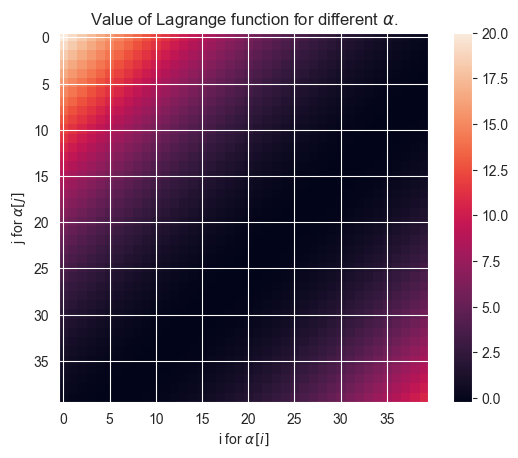

In [7]:
from scipy import optimize

# concatenate the vectors and outputs
X = np.array([X_1, X_2])
Y = np.array([Y_1, Y_2])

# plot the corresponding Lagrange function as an image to find the minimum visualy
a_test = np.arange(-2, 2, 0.1)
data = np.zeros((len(a_test), len(a_test), 1))
for i,vi in enumerate(a_test):
    for j,vj in enumerate(a_test):
        data[i,j] = Lagrange([vi,vj], Y, X)

c = plt.imshow(data)
plt.colorbar(c)
plt.ylabel(r'j for $\alpha[j]$')
plt.xlabel(r'i for $\alpha[i]$')
plt.title(r"Value of Lagrange function for different $\alpha$.")

#### Define the constraint with [scipy.optimize.LinearConstraint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.LinearConstraint.html#scipy.optimize.LinearConstraint)

In [8]:
# define the constraint
constraint = optimize.LinearConstraint(Y, 0.0, 0.0)
print(constraint)

#### Optimize and get the values of $\vec{\alpha}$

In [9]:
print(Lagrange([1., 1.], Y,X))
x = optimize.minimize(Lagrange, x0 = (1,1), args = (Y, X), constraints=constraint)
alphas = x['x']
alphas

2.0


array([0.25, 0.25])

#### Get $\vec{W}$.

In [10]:
W = alphas[0] * X[0] * Y[0] + alphas[1] * X[1] * Y[1]
W

array([-0.5, -0.5])

#### Get the bias $b$.

In [11]:
b = Y_1 - W.dot(X_1)
b

4.440892098500626e-16

#### Plot it!

8.881784197001248e-16 -1.0


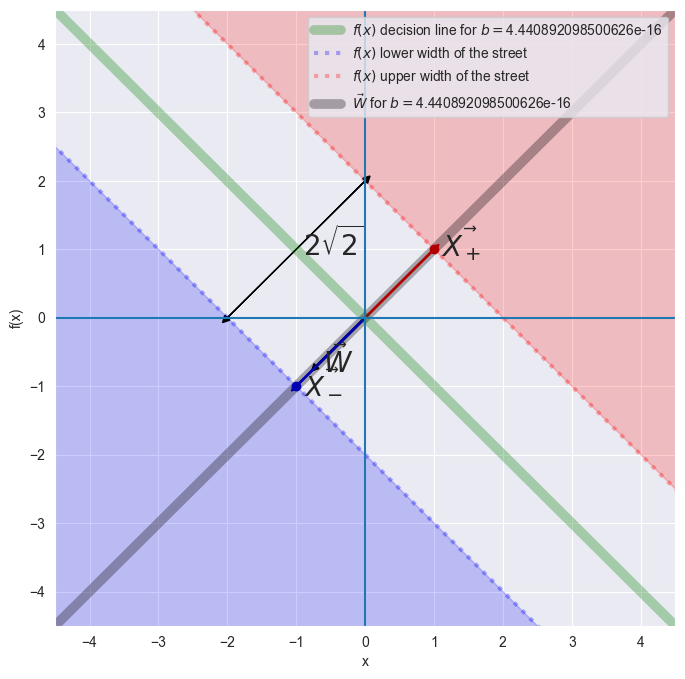

In [12]:
fig, ax     = plt.subplots(figsize=(8,8))

# define the calculated points
c           = -b/W[1]
a           = -W[0]/W[1]
print(c,a)

# perpendicular function to W
fp          = lambda x: a * x + c
fp1         = lambda x: a * (x-X_2[0]) + c + X_2[1]
fp2         = lambda x: a * (x-X_1[0]) + c + X_1[1]

# a function for parallel function to W (contains the vector W)
f           = lambda x: -1.0/a * x + c

# set xrange
x           = np.arange(-5, 5, 0.11)

# plot decision function
ax.plot(x,fp(x),
         color = 'green', alpha = 0.3, linewidth=7,
         label = f'$f(x)$ decision line for $b=$'+str(b))
ax.plot(x,fp1(x), linestyle = ':',
         color = 'blue', alpha = 0.3, linewidth=3,
         label = f'$f(x)$ lower width of the street')
ax.fill_between(x, x.min(), fp1(x), color = 'blue', alpha = 0.2)
ax.plot(x,fp2(x),linestyle = ':',
         color = 'red', alpha = 0.3, linewidth=3,
         label = f'$f(x)$ upper width of the street')
ax.fill_between(x, fp2(x), x.max(), color = 'red', alpha = 0.2)

# plot the weights function
ax.plot(x,f(x),
         color = 'black', alpha = 0.3, linewidth=7,
         label = r'$\vec{W}$ for $b=$'+str(b))


# plot W vector
norm = np.sqrt(np.sum(np.square(W)))
ax.arrow(0, 0, W[0]/norm, W[1]/norm, head_width = 0.1, width = 0.02,
          head_length=0.1, color = 'black')
# plot labels
ax.text(W[0]/norm + 0.1, W[1]/norm - 0.1, r'$\vec{W}$', fontsize=20)

# to plot width
x_width = -1.0
y_width = fp(x_width)
dx_width = X_2[0]
dy_width = X_2[1]
ax.arrow(x_width, y_width, dx_width, dy_width, head_width = 0.1,
          head_length=0.1, color = 'black')
dx_width = X_1[0]
dy_width = X_1[1]
ax.arrow(x_width, y_width, dx_width, dy_width, head_width = 0.1,
          head_length=0.1, color = 'black')
ax.text(x_width+ 0.1, y_width - 0.1,r'$2\sqrt {2}$', fontsize=20)


# check condition W * X laying on f(x) + b = 0
xp1 = X_1[0]
xp2 = X_2[0]
yp1 = X_1[1]
yp2 = X_2[1]
ax.scatter(xp1,yp1, color = 'red')
ax.scatter(xp2,yp2, color = 'blue')

# plot the support vectors
ax.arrow(0, 0, xp1, yp1, head_width = 0.1, width = 0.02,
          head_length=0.1, color = 'red')
ax.text(xp1 + 0.1, yp1 - 0.1, r'$\vec{X_+}$', fontsize=20)
ax.arrow(0, 0, xp2, yp2, head_width = 0.1, width = 0.02,
          head_length=0.1, color = 'blue')
ax.text(xp2 + 0.1, yp2 - 0.1, r'$\vec{X_-}$', fontsize=20)


# axes
ax.axhline(0)
ax.axvline(0)
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
plt.legend()

# Another labs

#### b) Take the provided data and compute the solution to the Lagrange problem through numerical methods.
- Plot the data and plot the corresponding support vectors.
- Plot the weights vector and the street by filling the space between the support lines. Use gradient to mark the strength of the slack variables.
- Calculate the width of the street.
- Find the slack variables for the outliers. Plot the distribution of the slack variables.
You can use the optimize method from Scipy: [optimization minimizer](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) as before. Define Lagrange function to be $-L(\vec{W})$ in order to find the maximum and use the constraint on the `width of the street` to find the optimal values. Experiment with $C$ parameter.

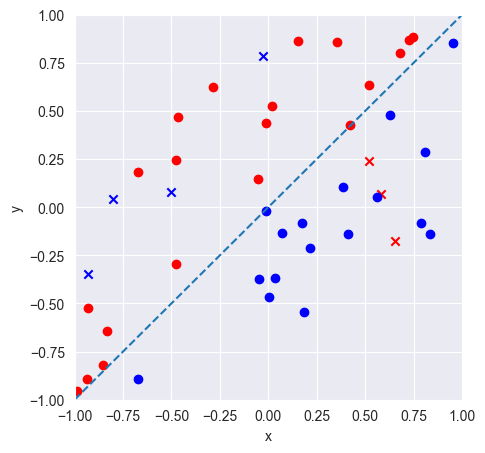

In [13]:
from scipy import optimize

plt.figure(figsize=(5,5))
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)

# create linearly separable data
n_samples   =   25
# create random points from that are defined as y > x to be assign with value -1
X1 = [-1.0 + 2*np.random.random() for i in range(n_samples)]
X1 = [np.array([i, i + np.random.random()]) for i in X1]
Y1 = [-1 for i in range(len(X1))]
# create random points from that are defined as y < x to be assign with value 1
X2 = [-1.0 + 2*np.random.random() for i in range(n_samples)]
X2 = [np.array([i, i - np.random.random()]) for i in X2]
Y2 = [1 for i in range(len(X2))]

# add some outliers (the points y > x have the value 1 and y < x -1)
n_outliers = 4
X1_o = [-1.0 + 2*np.random.random() for i in range(n_outliers)]
X1_o = [np.array([i, i - np.random.random()]) for i in X1_o]
Y1_o = [-1 for i in range(len(X1_o))]
X2_o = [-1.0 + 2*np.random.random() for i in range(n_outliers)]
X2_o = [np.array([i, i + np.random.random()]) for i in X2_o]
Y2_o = [-1 for i in range(len(X2_o))]

# plot the values
plt.plot(np.arange(-1.0, 1.0, 1e-3), np.arange(-1.0, 1.0, 1e-3), linestyle = '--')
plt.scatter(np.array(X1)[:,0], np.array(X1)[:,1],       color = 'red')
plt.scatter(np.array(X1_o)[:,0], np.array(X1_o)[:,1],   marker = 'x', color = 'red')
plt.scatter(np.array(X2)[:,0], np.array(X2)[:,1],       color = 'blue')
plt.scatter(np.array(X2_o)[:,0], np.array(X2_o)[:,1],   marker = 'x', color = 'blue')
plt.xlabel("x")
plt.ylabel("y")

# concatenate all the data
X_train = np.array(X1 + X2 + X1_o + X2_o)
Y_train = np.array(Y1 + Y2 + Y1_o + Y2_o)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)

In [14]:
'''
Note that the Lagrange function has minus at the beginning in order to use the scipy.optimize.minimize function.
'''
Y_Y_T   = np.zeros((len(Y_train), len(Y_train)))
DOTS    = np.zeros((len(Y_train), len(Y_train)))

# fill the values that we can calculate beforehand. Notice that those values include the dot products.
# Why is that so? Try answering the question taking into account the information from the lecture.
# Try to implemet this to be quicker, avoiding the for loops!

for i,xi in enumerate(X_train):
    for j,xj in enumerate(X_train):
        DOTS[i,j]   = np.dot(xi, xj)
        Y_Y_T[i,j]  = Y_train[i] * Y_train[j]
#Y_Y_T = np.outer(Y_train, Y_train))
#DOTS = np.dot(X_train, X_train.T)

print(DOTS[0])
print(X_train[0])
print(np.dot(X_train, X_train.T)[0])
print(DOTS == np.dot(X_train, X_train.T))
def Lagrange(alphas : np.ndarray):
    sum_alph = sum(alphas)
    Lag = sum_alph - (1/2) * np.sum(np.outer(alphas.T, alphas) * Y_Y_T * DOTS)
    return -Lag
    # it's a me, Lagrange function!
print(Lagrange(np.ones(len(X_train))))

[ 0.26059136  0.19144984 -0.27935523 -0.03775481 -0.29926509 -0.04579659
  0.27128904  0.0040132   0.27178533  0.15908192  0.07414378 -0.21742265
  0.03796368 -0.21465633 -0.43285171  0.40401531 -0.41539449 -0.18123358
 -0.06501729  0.42822918 -0.24385963  0.21685161 -0.40479265  0.3542703
  0.37834614  0.25429537  0.42537354  0.37175296 -0.30806525 -0.28822507
 -0.19118384  0.1818296  -0.29574763  0.36745171 -0.22563462 -0.28043118
  0.40823891 -0.27927534  0.26862216  0.26052853  0.340561   -0.11238651
  0.27998644  0.31273055 -0.38590361  0.44341115]
[-0.50463499  0.07703822]
[ 0.26059136  0.19144984 -0.27935523 -0.03775481 -0.29926509 -0.04579659
  0.27128904  0.0040132   0.27178533  0.15908192  0.07414378 -0.21742265
  0.03796368 -0.21465633 -0.43285171  0.40401531 -0.41539449 -0.18123358
 -0.06501729  0.42822918 -0.24385963  0.21685161 -0.40479265  0.3542703
  0.37834614  0.25429537  0.42537354  0.37175296 -0.30806525 -0.28822507
 -0.19118384  0.1818296  -0.29574763  0.36745171 -

##### Define the constraint with [scipy.optimize.LinearConstraint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.LinearConstraint.html#scipy.optimize.NonLinearConstraint).
How many constraints should we introduce?

In [15]:
# define the constraint
C           = 1.0
# y_train * alphas = 0
constraint  = optimize.LinearConstraint(Y_train, 0.0, 0.0)
constraints = []
# how many constraints should there be?
for i in range(len(Y_train)):
    A = np.zeros(len(Y_train))
    A[i] = 1
    cons = optimize.LinearConstraint(A, 0.0, C)
    # .
    constraints.append(cons)


##### Optimize and get the values of $\vec{\alpha}$

In [16]:
a       = optimize.minimize(Lagrange,
                            x0 = 0.05 * np.random.random(len(Y_train)),
                            constraints=[constraint] + constraints)
alphas  = a['x']
alphas

array([ 2.30608321e-14,  1.03252418e-14,  1.00000000e+00,  1.00000000e+00,
        1.69975036e-01,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        2.26679963e-14,  3.33345656e-01,  1.25424573e-14,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  3.87660681e-14,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.25449804e-14, -3.08476790e-15,
        1.00000000e+00,  1.00000000e+00,  3.16616414e-14,  2.93088930e-14,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.63370620e-01,  1.00000000e+00,  1.29567654e-14,  1.00000000e+00,
        1.25485629e-14,  1.00000000e+00,  1.01462515e-14,  1.00000000e+00,
        2.48994999e-14,  1.00000000e+00,  8.64892459e-15,  2.14522129e-14,
        1.00000000e+00,  9.18207881e-15,  2.35139986e-14,  2.06491744e-14,
        1.00000000e+00,  2.95314621e-14])

##### Determine the value of $b$ corresponding to any of the Support Vectors $\vec{X}_i$. To identify support vectors, locate $\alpha _i$ values that are non-zero.

In [17]:
# find support vectors by identifying nonzero alphas
support_idx = np.where(alphas > 0.99)

supports    =   []
for i in range(len(alphas)):
    if -1e-10<alphas[i] >1e-10:
      supports.append((alphas[i], Y_train[i], X_train[i]))

print(supports)

[(0.9999999999999186, 1, array([0.62646085, 0.47741022])), (0.9999999999999287, 1, array([ 0.00375352, -0.46549163])), (0.16997503610093279, -1, array([0.72568352, 0.86892189])), (0.9999999999999317, 1, array([ 0.0346572 , -0.36744552])), (0.9999999999999201, 1, array([-0.67402292, -0.89366683])), (0.9999999999999191, 1, array([-0.01131191, -0.02200442])), (0.33334565575300024, 1, array([-0.48719768, -1.12638981])), (0.9999999999999332, 1, array([ 0.40970289, -0.13853174])), (0.9999999999999444, -1, array([-0.05309213,  0.14501283])), (0.9999999999999252, -1, array([0.52235823, 0.63531984])), (0.9999999999999245, -1, array([-0.93661556, -0.8909042 ])), (0.999999999999926, 1, array([0.95361701, 0.85456298])), (0.9999999999999118, -1, array([0.42401068, 0.42494548])), (0.9999999999999076, -1, array([0.51982185, 0.23962996])), (0.9999999999999327, -1, array([-0.47511173, -0.29733805])), (0.9999999999999147, 1, array([-0.9139433 , -1.07559102])), (1.0000000000000904, 1, array([-0.7025929 ,

##### Find the corresponding value for $\vec{W}$ and $b$.

In [18]:
W   = np.zeros((2))
# try to avoid using this for loop
#for i in range(len(alphas)):
#     W += alphas[i] * Y_train[i] * X_train[i]

W = np.dot(alphas*Y_train, X_train)
print("W =", W)


b = np.zeros(len(supports))
for i, (alpha, y, x) in enumerate(supports):
    # find b for any of the support vectors
    b[i] = y - np.dot(W, x)

#for i, (alpha, y, x) in enumerate(supports):
    # find b for any of the support vectors
#  W
print(b)
print(Y_train - np.dot(X_train, W))

W = [ 1.773078   -2.08010625]
[ 0.88230005  0.02507267 -0.47924362  0.17422436  0.33617325  0.97428536
 -0.47917099 -0.01459591 -0.60422142 -0.60464912 -1.19248295  1.08674446
 -0.86787226 -1.42322891 -0.77608458  0.38314916 -0.46129944 -1.23236255
 -0.85404677 -0.47909615 -1.89287687 -2.58785719 -1.19431031 -0.53160151
  0.11483308 -0.22679635  0.1603585 ]
[ 0.05500488  0.79936202  0.88230005  0.02507267 -0.47924362  0.17422436
  0.33617325  0.97428536  0.7993554  -0.47917099  0.68438218 -0.01459591
 -0.60422142 -0.60464912 -0.77194556 -1.19248295  1.08674446 -0.86787226
  0.81490601 -0.44592215 -1.42322891 -0.77608458 -0.57187139  0.57657116
  0.38314916 -0.46129944 -1.23236255 -0.85404677 -0.47909615 -1.89287687
  1.15178225 -2.58785719  1.16425051 -1.19431031  0.40903533 -0.53160151
  0.50865711  0.11483308 -0.57896097  0.36231689 -0.22679635  0.15776004
 -1.012531   -1.07831414  0.1603585  -0.06795028]


##### Find the slack variables as $\xi _i = \max (0, 1 - (\vec{W} \cdot \vec{x} _ i + b) y_i)$

In [19]:
slackVars = []
for i, x in enumerate(X_train):
    slackVars.append(np.max((0, 1 - (np.dot(W, x) + b[2])* Y_train[i])))
slackVars

[0.0,
 0.0,
 1.361543671504339,
 0.5043162892979262,
 0.0,
 0.6534679780104299,
 0.8154168738781533,
 1.453528985583268,
 0.0,
 7.262878169811415e-05,
 0.0,
 0.46464771246746683,
 0.12497780040052375,
 0.12540549494634834,
 0.0,
 0.7132393246416482,
 1.5659880803508872,
 0.3886286336990058,
 0.0,
 0.0,
 0.9439852871346643,
 0.29684095880465466,
 0.0,
 0.0,
 0.8623927782854828,
 0.01794417824223138,
 0.753118928884223,
 0.3748031510384562,
 0.0,
 1.413633248113101,
 0.0,
 2.1086135632805827,
 0.0,
 0.7150666874214524,
 0.0,
 0.052357887401419445,
 0.0,
 0.5940766984300336,
 0.0,
 0.0,
 0.25244727027297675,
 0.0,
 0.0,
 0.0,
 0.6396021220790025,
 0.0]

##### Find two support vectors with different values of Y $(\pm 1)$.

In [20]:
Sone        = None
Smone       = None

Sone_close  = 1e13
Smone_close = 1e13

for i, s in enumerate(X_train):
    continue

Sone = X_train[support_idx[0][np.where(Y_train[support_idx] > 0)[0][0]]]
Smone = X_train[support_idx[0][np.where(Y_train[support_idx] < 0)[0][0]]]

Sone, Smone

(array([0.62646085, 0.47741022]), array([-0.05309213,  0.14501283]))

##### Evaluate the model predictions against the actual class labels. Assess the accuracy using the metric provided by [scikit-learn's accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [21]:
for b_i in range(len(b)):
  y_pred  = []
  for x in X_test:
      if np.dot(W, x) + b[b_i] < 0:
          y_pred.append(-1)
      else:
          y_pred.append(1)
y_pred  = []
for x in X_test:
  if np.dot(W, x) + b[0] < 0:
    y_pred.append(-1)
  else:
    y_pred.append(1)

##### Plot all

Crossing point c =  0.42416104940852245 Tangent coefficient a = 0.8523978046957008


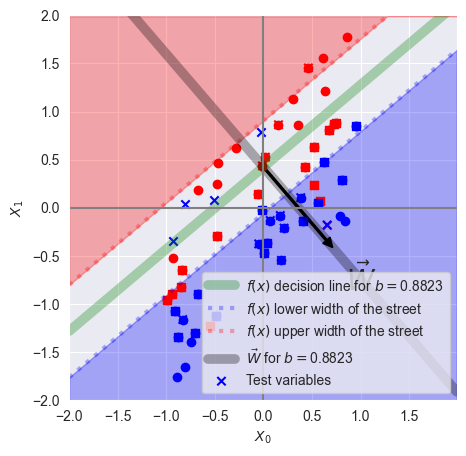

In [22]:
fig, ax     = plt.subplots(figsize=(5, 5))

# define the calculated points of decision line crossing
c           = -b[0]        / W[1]
c1          = -(b[0] - 1)  / W[1]
c2          = -(b[0] + 1)  / W[1]
a           = -W[0]     / W[1]
print("Crossing point c = ", c, "Tangent coefficient a =", a)

# perpendicular function to W - this can be defined for any support vectors as well and is
# a decision line
fp  =   lambda x: a * x + c
fp1 =   lambda x: a * x + c1
fp2 =   lambda x: a * x + c2

# a lambda for parallel function to W (contains the vector W)
f   =   lambda x: -1.0/a * x + c

# set xrange
x   =   np.arange(-2, 2, 0.01)

# plot decision function
ax.plot(    x,
            fp(x),
            color       =   'green',
            alpha       =   0.3,
            linewidth   =   7,
            label       =   f'$f(x)$ decision line for $b=${b[0]:.4f}')

# first category (+1)
ax.plot(    x,
            fp1(x),
            linestyle   =   ':',
            color       =   'blue',
            alpha       =   0.3,
            linewidth   =   3,
            label       =   f'$f(x)$ lower width of the street')
# fill the values below lines
ax.fill_between(x, x.min(), fp1(x), color = 'blue', alpha = 0.3)

# second category (-1)
ax.plot(    x,
            fp2(x),
            linestyle   =   ':',
            color       =   'red',
            alpha       =   0.3,
            linewidth   =   3,
            label       =   f'$f(x)$ upper width of the street')
ax.fill_between(x, fp2(x), x.max(), color = 'red', alpha = 0.3)

# plot the weights function
ax.plot(    x,
            f(x),
            color       =   'black',
            alpha       =   0.3,
            linewidth   =   7,
            label       =   r'$\vec{W}$ for $b=$'+ f'{b[0]:.4f}')

# plot W vector
norm    =   np.sqrt(np.sum(np.square(W)))
ax.arrow(   0,
            c,
            W[0]   /   norm,
            W[1]   /   norm,
            head_width  =   0.1,
            width       =   0.02,
            head_length =   0.1,
            color       =   'black')

# plot labels
ax.text(W[0]    /   norm + 0.2,
        W[1]    /   norm - 0.1,
        r'$\vec{W}$',
        fontsize=20)

# to plot width
#ax.text(0 - 1.8, c ,
#        f'width={np.dot(Sone - Smone, W) / norm : .1e}',
#        rotation = np.math.tanh(a) * 360 / 2 / np.pi)



# scatter the points, mark the outliers with x
ax.scatter(np.array(X1)[:,0], np.array(X1)[:,1],        marker = "o",    color = 'red')
ax.scatter(np.array(X1_o)[:,0], np.array(X1_o)[:,1],    marker = "x",    color = 'red')
ax.scatter(np.array(X2)[:,0], np.array(X2)[:,1],        marker = "o",    color = 'blue')
ax.scatter(np.array(X2_o)[:,0], np.array(X2_o)[:,1],    marker = "x",    color = 'blue')

# plot the support vectors
for alpha, YY, XX in supports:
        c = 'red' if (YY == -1) else 'blue'
        ax.scatter(XX[0], XX[1], marker='s', color = c)
# ax.set_title(f"Accuracy={accuracy_score(y_pred, Y_test):.2e}")

# mark the tests
colors = ['blue' if (x == 1) else 'red' for x in y_pred]
ax.scatter(np.array(X_test)[:,0], np.array(X_test)[:,1],
                marker = "x", color = colors, label = "Test variables")


ax.axhline(0, color = 'grey')
ax.axvline(0, color = 'grey')
ax.set_ylabel('$X_1$')
ax.set_xlabel('$X_0$')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(-2, 2)
plt.legend(frameon = True)

#### e) For a given data use the SVM from [scikit-learn](https://scikit-learn.org/stable/modules/svm.html). Use different kernels and compare the results.
- plot the support vectors
- test the accuracy for different kernels
- check other parameters in the documentation

C:\Users\Michal\AppData\Local\Temp\ipykernel_31836\2818017882.py:6: RuntimeWarning: invalid value encountered in sqrt
  decision_function = lambda x, a, b: b*np.sqrt(1 - x**2/a**2)


Text(0, 0.5, 'y')

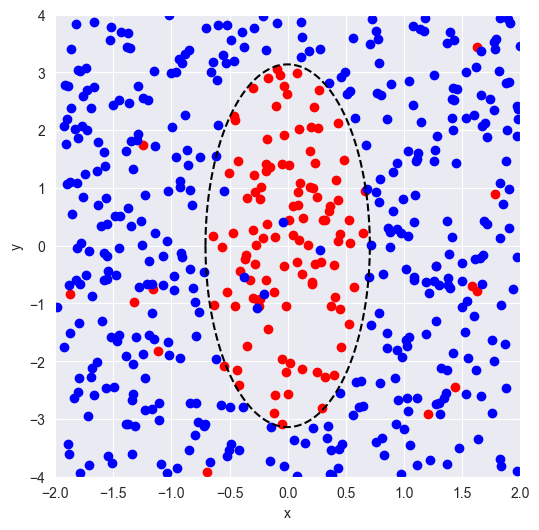

In [23]:
plt.figure(figsize=(6,6))
plt.xlim(-2,2)
plt.ylim(-4,4)

# elipse
decision_function = lambda x, a, b: b*np.sqrt(1 - x**2/a**2)
a       = 0.707
b       = 3.14
n       = 500

X       = -2.0 + 2 * 2 * np.random.random(n)
Y       = -4.0 + 2 * 4 * np.random.random(n)
X_m1    = []
X_1     = []
Y_train = []
X_train = []

# add classes
for i, x in enumerate(X):
    if x**2 / a**2 + Y[i]**2 / b**2 > 1:
        X_1.append(np.array([x, Y[i]]))
        Y_train.append(1)
    else:
        X_m1.append(np.array([x, Y[i]]))
        Y_train.append(0)
    X_train.append(np.array([x, Y[i]]))

n = 20
X = -2.0 + 2 * 2 * np.random.random(n)
Y = -4.0 + 2 * 4 * np.random.random(n)
# add outliers
for i, x in enumerate(X):
    if x**2 / a**2 + Y[i]**2 / b**2 > 1:
        X_m1.append(np.array([x, Y[i]]))
        Y_train.append(0)
    else:
        X_1.append(np.array([x, Y[i]]))
        Y_train.append(1)
    X_train.append(np.array([x, Y[i]]))
X_1     = np.array(X_1)
X_m1    = np.array(X_m1)
X_train = np.array(X_train)
Y_train = np.array(Y_train)


X = np.arange(-2.5, 2.5, 1e-4)
plt.plot(X, decision_function(X, a, b), linestyle = '--', color = 'black')
plt.plot(X, -decision_function(X, a, b), linestyle = '--', color = 'black')

plt.scatter(X_m1[:,0], X_m1[:,1], color = 'red', label = '0')
plt.scatter(X_1[:,0], X_1[:,1], color = 'blue', label = '1')
plt.xlabel('x')
plt.ylabel('y')

In [24]:
from sklearn import svm

# define different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
randint = np.random.randint(0, len(kernels)-1)
# choose random or choose by hand
kernel  = kernels[randint]
print("Kernel = ", kernel)

clf     = svm.SVC(kernel=kernel)
clf.fit(X_train, Y_train)

Kernel =  rbf


SVC()

##### Plot the predictions and see how it goes :).

In [27]:
n       = 200
X_test  = np.array([np.array([-2.0 + 2 * 2 * np.random.random(), -4.0 + 2 * 4 * np.random.random()]) for i in range(n)])
Y_pred  = clf.predict(X_test)
colors  = ['red' if i == 0 else 'blue' for i in Y_pred]
colors

['red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',

C:\Users\Michal\AppData\Local\Temp\ipykernel_31836\2818017882.py:6: RuntimeWarning: invalid value encountered in sqrt
  decision_function = lambda x, a, b: b*np.sqrt(1 - x**2/a**2)


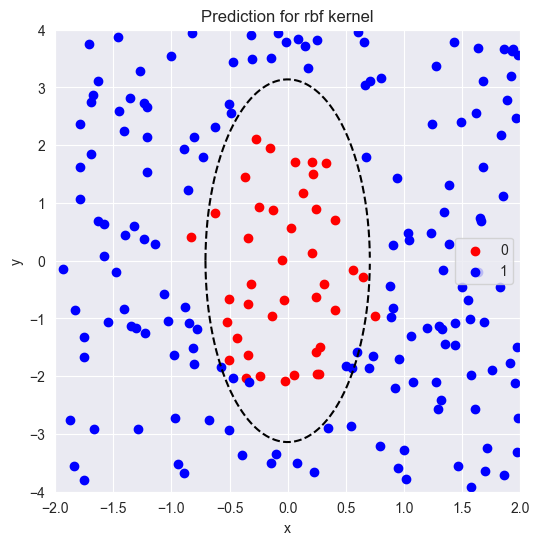

In [28]:
plt.figure(figsize=(6,6))
plt.xlim(-2,2)
plt.ylim(-4,4)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Prediction for {kernel} kernel')

# plot the elipse
X = np.arange(-2.5, 2.5, 1e-4)
plt.plot(X, decision_function(X, a, b), linestyle = '--', color = 'black')
plt.plot(X, -decision_function(X, a, b), linestyle = '--', color = 'black')

# scatter points
zero, one = None, None
for i in range(n):
    if colors[i] == 'red':
        zero = plt.scatter(X_test[i][0], X_test[i][1], color = colors[i], label = '0')
    else:
        one = plt.scatter(X_test[i][0], X_test[i][1], color = colors[i], label = '1')

plt.legend(handles = [zero, one])

### [**Additional homework] If you want, you can implement SVM class. It can be based on the scikit-learn class, yet must be done by yourself as a whole and sent by the end of `last tutorials`. You shall show how it works for different types of data and implement kernel trick, soft margin and hard margin. It shall also compare clustering algorithms shown during the lecture to `your SVM`.

# I have done it and it is in folder `My SVM implementation`